/Applications/anaconda3/lib/python3.11/site-packages/pandas/core/arrays/masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


📥 Loading Kaggle data...
✅ Combined dataset size: 44898
🧹 Preprocessing text...
✅ Preprocessed dataset size: 44898
🔀 Splitting into train/test sets...
✅ Train size: 35918, Test size: 8980
🔠 Vectorizing with TF-IDF...
✅ TF-IDF complete.
🚀 Training Logistic Regression model...


/Applications/anaconda3/lib/python3.11/site-packages/pandas/core/arrays/masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


✅ Model trained.
📊 Evaluating on test set...

✅ Accuracy: 0.98842

📄 Classification Report:
              precision    recall  f1-score   support

        Fake    0.99249   0.98531   0.98889      4696
        Real    0.98402   0.99183   0.98791      4284

    accuracy                        0.98842      8980
   macro avg    0.98826   0.98857   0.98840      8980
weighted avg    0.98845   0.98842   0.98842      8980



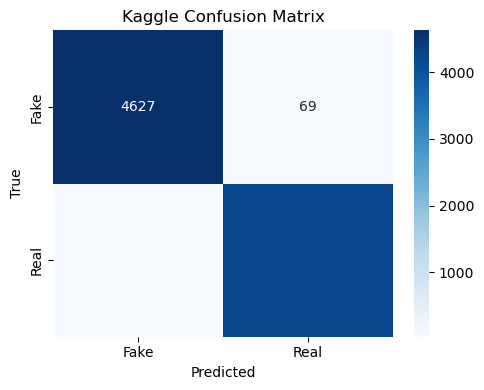

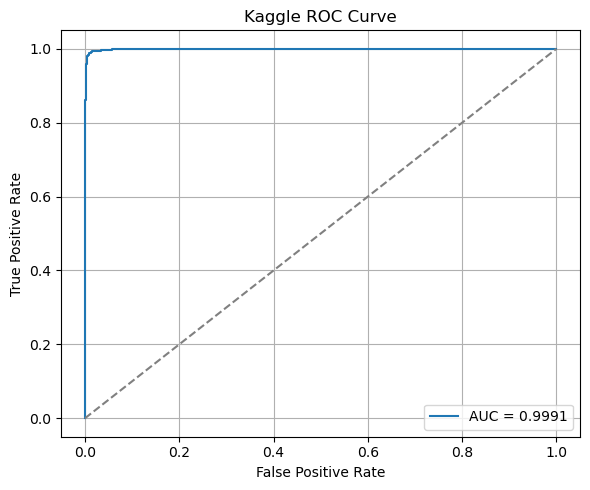

📐 ROC AUC Score: 0.999114
💾 Saving results...
✅ All tasks completed. Results saved.


In [ ]:
# KAGGLE DATASET: Logistic Regression Pipeline

import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import (
    accuracy_score, classification_report,
    confusion_matrix, roc_curve, roc_auc_score
)

# Text Preprocessing Function
def preprocess_text(text):
    text = text.lower()
    text = re.sub(r'\W', ' ', text)
    text = re.sub(r'\s+', ' ', text).strip()
    return text

# Load & Prepare Kaggle Data
print("Loading Kaggle data...")
fake_df = pd.read_csv("../data/Fake.csv")
true_df = pd.read_csv("../data/True.csv")
fake_df["label"] = 0
true_df["label"] = 1

df = pd.concat([fake_df, true_df], ignore_index=True)
print(f"Combined dataset size: {len(df)}")

# Preprocess text and drop missing
print("🧹 Preprocessing text...")
df["clean_text"] = df["text"].apply(preprocess_text)
df = df.dropna(subset=["clean_text"])
print(f"Preprocessed dataset size: {len(df)}")

# Train-Test Split (80/20)
print("🔀 Splitting into train/test sets...")
X_train, X_test, y_train, y_test = train_test_split(
    df["clean_text"], df["label"], test_size=0.2, random_state=42, stratify=df["label"]
)
print(f"Train size: {len(X_train)}, Test size: {len(X_test)}")


# TF-IDF Vectorization
print("🔠 Vectorizing with TF-IDF...")
vectorizer = TfidfVectorizer(max_features=10000, stop_words="english", ngram_range=(1, 3))
X_train_tfidf = vectorizer.fit_transform(X_train)
X_test_tfidf = vectorizer.transform(X_test)
print("TF-IDF complete.")

# Train Logistic Regression
print("Training Logistic Regression model...")
model = LogisticRegression(max_iter=200, n_jobs=-1, random_state=42)
model.fit(X_train_tfidf, y_train)
print("Model trained.")

# Predictions & Evaluation
print("Evaluating on test set...")
y_pred = model.predict(X_test_tfidf)
y_prob = model.predict_proba(X_test_tfidf)[:, 1]  # Prob for class 1

# Accuracy and classification report
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.5f}")
print("Classification Report:")
print(classification_report(y_test, y_pred, target_names=["Fake", "Real"], digits=5))

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(5, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=["Fake", "Real"], yticklabels=["Fake", "Real"])
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Kaggle Confusion Matrix")
plt.tight_layout()
plt.show()

# ROC Curve & AUC
roc_auc = roc_auc_score(y_test, y_prob)
fpr, tpr, _ = roc_curve(y_test, y_prob)

plt.figure(figsize=(6, 5))
plt.plot(fpr, tpr, label=f'AUC = {roc_auc:.4f}')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Kaggle ROC Curve')
plt.legend(loc="lower right")
plt.grid(True)
plt.tight_layout()
plt.show()

print(f"ROC AUC Score: {roc_auc:.6f}")

# Save Results
print("💾 Saving results...")
report_df = pd.DataFrame(classification_report(y_test, y_pred, output_dict=True)).transpose()
report_df.to_excel("LR_Kaggle_Classification_Report.xlsx")

results_df = X_test.to_frame(name="text")
results_df["predicted_label"] = y_pred
results_df["true_label"] = y_test.values
results_df.to_excel("LR_Kaggle_Predictions.xlsx", index=False)

print("All tasks completed. Results saved.")
